#        FINANCIAL DATA INFRASTRUCTURE     
##                    Rennes School of Business
##                     Group Project Prediction of Default of Loan
####       LendingClub | Peer-to-Peer Lending & Alternative Investing
                                        Winter 2021





The following Paython code is Filter data given various criteria from a big data set of LendingClub.
This is a Peer-to-Peer Lending and Alternative Investing business. LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. LendingClub enables borrowers to create unsecured personal loans between 1,000 and 40,000 dollars. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.The dataset contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. Each row is divided by an individual loan id and member id, of course, for the interest of privacy each member id has been removed from the dataset.


For this task is to identify the most important variables to explain default of loans. To do this you need to develope model in the Spark framework and using textual infomation of description of loan lending club.


You can find information about dataset from LCDataDictionary.csv file uploaded to moodle.
Please use this website for hints about wrting SQL

http://lgatto.github.io/sql-ecology/01-sql-basic-queries.html


Report

For this task, you need to pick seed number for sampling of data accourding to your group number, and forecast the news labes.


##Students name 	  Student No.	      
#### 1.Tianyun ZHANG ETU20230484
#### 2.Xuanbei ZENG ETU20211513
#### 3.Xavier Charles-angele ETU20211930
#### 4.Titouan Himbaza ETU20221267
#### 5.Erik HOLSTSANDE ETU20192065


##Group:


The dataset contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. Each row is divided by an individual loan id and member id, of course, for the interest of privacy each member id has been removed from the dataset.

* loan_status:
* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* funded_amnt: The total amount funded by investors for that loan at that point in time.
* term: The Number of payments on the loan. Values are in months and can be either 36 or 60.
* grade: LC assigned loan grade
* sub_grade: LC assigned loan subgrade
* home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
* verification_status: The status of the loan during the listing period. Values: APPROVED, NOT_APPROVED.
* purpose: A category provided by the borrower for the loan request. Values are: debt_consolidation, medical, home_improvement, renewable_energy, small_business, wedding, vacation, moving, house, car, major_purchase, credit_card, other
* emp_length: Employment length in months. Possible values are whole numbers from 0 and higher. Null indicates not employed.
* int_rate: Interest Rate on the loan
* annual_inc: The annual income provided by the borrower during registration.
* dti: The borrower's debt to income ratio, calculated using the monthly payments on the total debt obligations, excluding mortgage, divided by self-reported monthly income.
* inq_last_6mths: information from the bureau last 6 months
* pub_rec: it indicates risk and hurts your ability to qualify for credit, obligations that were not paid
* revol_bal: sometimes a full payment doesn’t (or can’t) happen, The amount of credit you have versus the amount of credit you use is a factor in your credit score
* revol_util: the amount of credit the borrower is using relative to all available revolving credit.
* total_acc: The total Number of credit lines currently in the borrower's credit file
* total_pymnt: The total payment currently
* total_pymnt_inv: The total payment currently of investment
* total_rec_prncp:
* total_rec_int:  interest of recollect total.

### Running Pyspark in Colab

To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. Apache Spark 2.3.2 with hadoop 2.7, Java 8 and Findspark to locate the spark in the system. The tools installation can be carried out inside the Jupyter Notebook of the Colab. One important note is that if you are new in Spark, it is better to avoid Spark 2.4.0 version since some people have already complained about its compatibility issue with python.
Follow the steps to install the dependencies:

In [1]:
import os

# Install java
! apt-get update -qq
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install pyspark
! pip install --ignore-installed pyspark

# Install Spark NLP
! pip install --ignore-installed spark-nlp

openjdk version "1.8.0_402"
OpenJDK Runtime Environment (build 1.8.0_402-8u402-ga-2ubuntu1~22.04-b06)
OpenJDK 64-Bit Server VM (build 25.402-b06, mixed mode)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 1.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=538fa2ea4f8b0284f9d60f34bd993a3e75dc077f36944a36be70aa1027126db3
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 3.5 MB/s eta 0:00:00


In [1]:
# #Imports
# import sys
# sys.path.append('../../')

# import sparknlp

from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.sql.functions import array_contains
from sparknlp.annotator import *
from sparknlp.common import RegexRule
from sparknlp.base import DocumentAssembler, Finisher

In [2]:
import sparknlp

spark = sparknlp.start()

print("Spark NLP version: ", sparknlp.version())
print("Apache Spark version: ", spark.version)

24/04/20 17:15:51 WARN Utils: Your hostname, MacBook-Pro-7.local resolves to a loopback address: 127.0.0.1; using 10.63.5.162 instead (on interface en0)
24/04/20 17:15:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Ivy Default Cache set to: /Users/Apple/.ivy2/cache
The jars for the packages stored in: /Users/Apple/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-a9372f3e-4239-4cc3-8937-bb61c6f7ef76;1.0
	confs: [default]


:: loading settings :: url = jar:file:/Users/Apple/ZTY/anaconda3/envs/Pyspark/lib/python3.12/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


	found com.johnsnowlabs.nlp#spark-nlp_2.12;5.3.2 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-s3;1.12.500 in central
	found com.amazonaws#aws-java-sdk-kms;1.12.500 in central
	found com.amazonaws#aws-java-sdk-core;1.12.500 in central
	found commons-logging#commons-logging;1.1.3 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.httpcomponents#httpclient;4.5.13 in central
	found org.apache.httpcomponents#httpcore;4.4.13 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found joda-time#joda-time;2.8.1 in central
	found com.amazonaws#jmespath-java;1.12.500 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in ce

Spark NLP version:  5.3.2
Apache Spark version:  3.5.1


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 57226)
Traceback (most recent call last):
  File "/Users/Apple/ZTY/anaconda3/envs/PySpark/lib/python3.12/socketserver.py", line 318, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Users/Apple/ZTY/anaconda3/envs/PySpark/lib/python3.12/socketserver.py", line 349, in process_request
    self.finish_request(request, client_address)
  File "/Users/Apple/ZTY/anaconda3/envs/PySpark/lib/python3.12/socketserver.py", line 362, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Users/Apple/ZTY/anaconda3/envs/PySpark/lib/python3.12/socketserver.py", line 761, in __init__
    self.handle()
  File "/Users/Apple/ZTY/anaconda3/envs/PySpark/lib/python3.12/site-packages/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/Users/Apple/ZTY/anaconda3/envs/PySpark/lib/python3.12/site-packages/pyspark/a

In [3]:
from pyspark.ml.classification import OneVsRest
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.classification import RandomForestClassifier,LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.ml.feature import HashingTF, IDF, StringIndexer, SQLTransformer,IndexToString

import pandas as pd
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.ml.feature import NGram

In [4]:
ldata=pd.read_csv("Lending Club Loan Data_Lending Club - loan.csv")

/var/folders/hv/5dn5hgjs25b55wzdrz7cpzdc0000gn/T/ipykernel_25839/2056069749.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  ldata=pd.read_csv("Lending Club Loan Data_Lending Club - loan.csv")


In [5]:
ldata.shape

(887379, 74)

In [98]:
ldata

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [6]:
ldata.groupby('loan_status').count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,45248,45248,45248,45248,45248,45248,45248,45248,45248,45248,...,0,0,0,0,0,0,35229,0,0,0
Current,601779,601779,601779,601779,601779,601779,601779,601779,601779,601779,...,13144,11483,13144,13144,13144,13144,598192,13144,13144,13144
Default,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,...,0,0,0,0,0,0,1201,0,0,0
Does not meet the credit policy. Status:Charged Off,761,761,761,761,761,761,761,761,761,761,...,0,0,0,0,0,0,0,0,0,0
Does not meet the credit policy. Status:Fully Paid,1988,1988,1988,1988,1988,1988,1988,1988,1988,1988,...,0,0,0,0,0,0,0,0,0,0
Fully Paid,207723,207723,207723,207723,207723,207723,207723,207723,207723,207723,...,144,126,144,144,144,144,154034,144,144,144
In Grace Period,6253,6253,6253,6253,6253,6253,6253,6253,6253,6253,...,82,75,82,82,82,82,6187,82,82,82
Issued,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460,...,8002,6933,8002,8002,8002,8002,8460,8002,8002,8002
Late (16-30 days),2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,...,0,0,0,0,0,0,2330,0,0,0


In [43]:
ldata_multiclass=pd.read_csv("Lending Club Loan Data_Lending Club - loan.csv")

/var/folders/hv/5dn5hgjs25b55wzdrz7cpzdc0000gn/T/ipykernel_25839/2816034214.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  ldata_multiclass=pd.read_csv("Lending Club Loan Data_Lending Club - loan.csv")


In [7]:
def categorize_status(data):
  default_s=[
      "Charged Off", "Default", "Late (16–30 days)", "Late (31–120 days)", "Does not meet the credit policy. Status:Charged Off"
  ]
  return "Default" if data in default_s else "Non-default"

ldata['loan_status']=ldata['loan_status'].apply(categorize_status)

ldata['loan_status'].unique()

array(['Non-default', 'Default'], dtype=object)

In [8]:
ldata.groupby('loan_status').count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
loan_status,,,,,,,,,,,,,,,,,,,,,
Default,47228,47228,47228,47228,47228,47228,47228,47228,47228,47228,...,0,0,0,0,0,0,36430,0,0,0
Non-default,840151,840151,840151,840151,840151,840151,840151,840151,840151,840151,...,21372,18617,21372,21372,21372,21372,780673,21372,21372,21372


In [9]:
non_default=ldata[ldata['loan_status']=='Non-default']
non_default.shape

(840151, 74)

In [10]:
default_data=ldata[ldata['loan_status']=='Default']

In [95]:
default_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1064687,1298717,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1069057,1303503,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887303,37087435,39850186,12000.0,12000.0,12000.0,36 months,17.86,432.99,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,3800.0,NaN,NaN,NaN
887308,37227443,40000189,2725.0,2725.0,2725.0,36 months,17.86,98.33,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,5800.0,NaN,NaN,NaN
887330,37077186,39839905,14000.0,14000.0,14000.0,36 months,15.99,492.13,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,12100.0,NaN,NaN,NaN
887351,36743377,39486112,4200.0,4200.0,4200.0,36 months,15.99,147.64,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,20400.0,NaN,NaN,NaN


In [99]:
balanced_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [12]:
non_default_sample=non_default.sample(n=47228)

In [13]:
balanced_data=pd.concat([default_data,non_default_sample])

In [14]:
balanced_data.groupby('loan_status').count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
loan_status,,,,,,,,,,,,,,,,,,,,,
Default,47228,47228,47228,47228,47228,47228,47228,47228,47228,47228,...,0,0,0,0,0,0,36430,0,0,0
Non-default,47228,47228,47228,47228,47228,47228,47228,47228,47228,47228,...,1187,1034,1187,1187,1187,1187,43911,1187,1187,1187


In [15]:
ldata.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [16]:
ldata

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [17]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [18]:
numeric_data=ldata.dropna(axis=1)

In [19]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       887379 non-null  int64  
 1   member_id                887379 non-null  int64  
 2   loan_amnt                887379 non-null  float64
 3   funded_amnt              887379 non-null  float64
 4   funded_amnt_inv          887379 non-null  float64
 5   term                     887379 non-null  object 
 6   int_rate                 887379 non-null  float64
 7   installment              887379 non-null  float64
 8   grade                    887379 non-null  object 
 9   sub_grade                887379 non-null  object 
 10  home_ownership           887379 non-null  object 
 11  verification_status      887379 non-null  object 
 12  issue_d                  887379 non-null  object 
 13  loan_status              887379 non-null  object 
 14  pymn

In [20]:
numeric_data['loan_status_numeric']=(numeric_data['loan_status']=='Default').astype('float64')

/var/folders/hv/5dn5hgjs25b55wzdrz7cpzdc0000gn/T/ipykernel_25839/2762637674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['loan_status_numeric']=(numeric_data['loan_status']=='Default').astype('float64')


In [21]:
numeric_data=numeric_data.select_dtypes(include=['float64']).drop('policy_code',axis=1)

In [22]:
numeric_data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_status_numeric
0,5000.0,5000.0,4975.0,10.65,162.87,27.65,13648.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0
1,2500.0,2500.0,2500.0,15.27,59.83,1.00,1687.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1.0
2,2400.0,2400.0,2400.0,15.96,84.33,8.72,2956.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0
3,10000.0,10000.0,10000.0,13.49,339.31,20.00,5598.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0
4,3000.0,3000.0,3000.0,12.69,67.79,17.94,27783.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,11.99,332.10,28.69,14037.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,332.10,0.0
887375,24000.0,24000.0,24000.0,11.99,797.03,3.90,8621.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,0.00,797.03,0.0
887376,13000.0,13000.0,13000.0,15.99,316.07,30.90,11031.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,0.00,316.07,0.0
887377,12000.0,12000.0,12000.0,19.99,317.86,27.19,8254.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,0.00,317.86,0.0


In [23]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                887379 non-null  float64
 1   funded_amnt              887379 non-null  float64
 2   funded_amnt_inv          887379 non-null  float64
 3   int_rate                 887379 non-null  float64
 4   installment              887379 non-null  float64
 5   dti                      887379 non-null  float64
 6   revol_bal                887379 non-null  float64
 7   out_prncp                887379 non-null  float64
 8   out_prncp_inv            887379 non-null  float64
 9   total_pymnt              887379 non-null  float64
 10  total_pymnt_inv          887379 non-null  float64
 11  total_rec_prncp          887379 non-null  float64
 12  total_rec_int            887379 non-null  float64
 13  total_rec_late_fee       887379 non-null  float64
 14  reco

In [96]:
balanced_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1064687,1298717,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1069057,1303503,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361953,19786859,22009608,28000.0,28000.0,28000.0,36 months,8.39,882.47,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,146100.0,NaN,NaN,NaN
641973,12246034,14238183,21000.0,21000.0,21000.0,60 months,14.65,495.74,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,30500.0,NaN,NaN,NaN
449025,11416514,13348709,12000.0,12000.0,12000.0,60 months,13.53,276.31,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,16600.0,NaN,NaN,NaN
48509,9705900,11557854,35000.0,35000.0,35000.0,60 months,22.40,974.64,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,57300.0,NaN,NaN,NaN


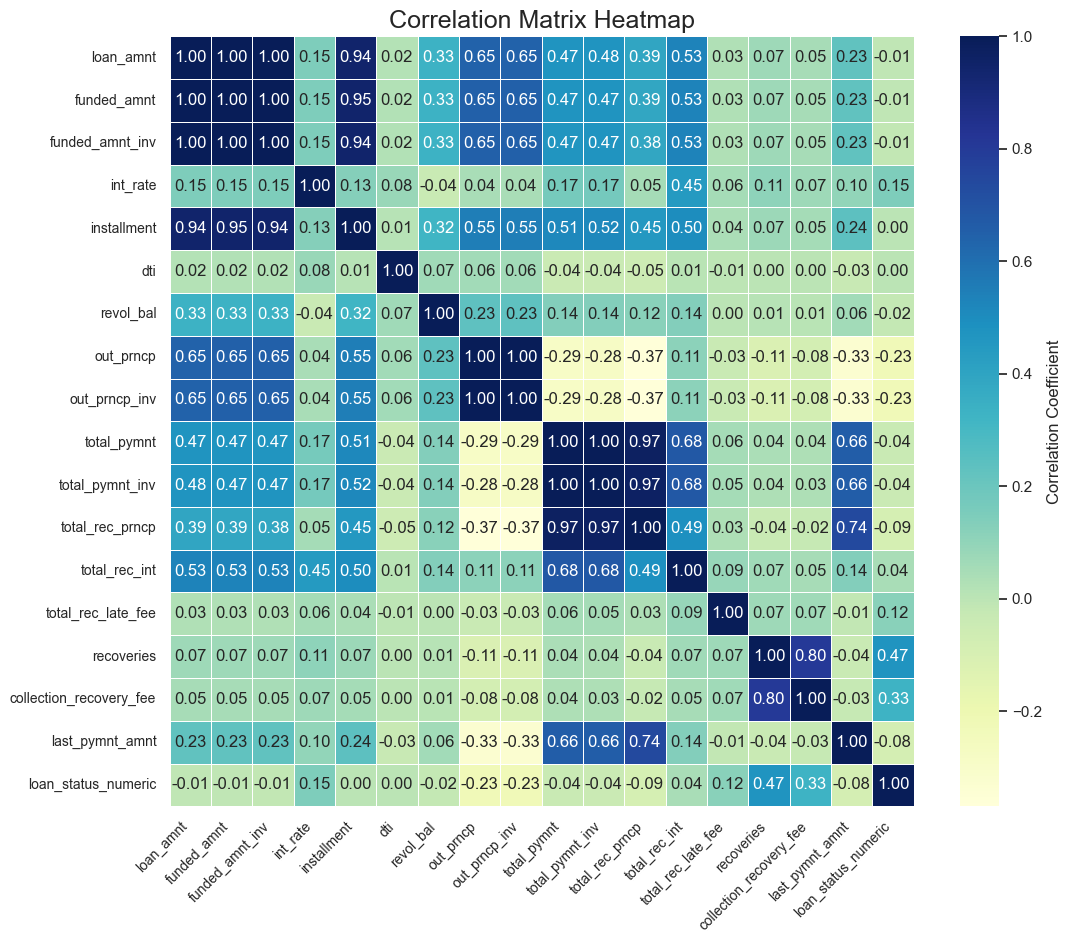

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='white')

corr = numeric_data.corr()


plt.figure(figsize=(12, 10))


ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Correlation Coefficient'},linewidths=.5)


plt.title('Correlation Matrix Heatmap', fontsize=18)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)


plt.show()



In [25]:
ldata.groupby('loan_status').count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
loan_status,,,,,,,,,,,,,,,,,,,,,
Default,47228,47228,47228,47228,47228,47228,47228,47228,47228,47228,...,0,0,0,0,0,0,36430,0,0,0
Non-default,840151,840151,840151,840151,840151,840151,840151,840151,840151,840151,...,21372,18617,21372,21372,21372,21372,780673,21372,21372,21372


In [97]:
spark = SparkSession.builder.appName("example").getOrCreate()

loan_df = spark.createDataFrame(ldata)

In [91]:
balanced_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1064687,1298717,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1069057,1303503,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361953,19786859,22009608,28000.0,28000.0,28000.0,36 months,8.39,882.47,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,146100.0,NaN,NaN,NaN
641973,12246034,14238183,21000.0,21000.0,21000.0,60 months,14.65,495.74,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,30500.0,NaN,NaN,NaN
449025,11416514,13348709,12000.0,12000.0,12000.0,60 months,13.53,276.31,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,16600.0,NaN,NaN,NaN
48509,9705900,11557854,35000.0,35000.0,35000.0,60 months,22.40,974.64,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,57300.0,NaN,NaN,NaN


In [27]:
spark2 = SparkSession.builder.appName("example2").getOrCreate()
balanced_loan_df = spark2.createDataFrame(balanced_data)

24/04/20 17:25:12 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [44]:
spark3 = SparkSession.builder.appName("example3").getOrCreate()
loan_df_multiclass = spark3.createDataFrame(ldata_multiclass)

24/04/20 17:48:28 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [27]:
balanced_loan_df.show()

24/04/20 17:02:42 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/04/20 17:02:43 WARN TaskSetManager: Stage 0 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/20 17:02:47 ERROR Inbox: Ignoring error                       (0 + 1) / 1]
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockM

+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-----------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+--------------

In [13]:
loan_df.show()

24/04/04 01:19:18 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/04/04 01:19:19 WARN TaskSetManager: Stage 0 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/04 01:19:23 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 0 (TID 0): Attempting to kill Python Worker


+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+------------

In [32]:
balanced_loan_df.show()

24/04/16 00:49:15 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/04/16 00:49:15 WARN TaskSetManager: Stage 0 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 00:49:20 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 0 (TID 0): Attempting to kill Python Worker


+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-----------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+--------------

Text(0, 0.5, 'Loan Amount')

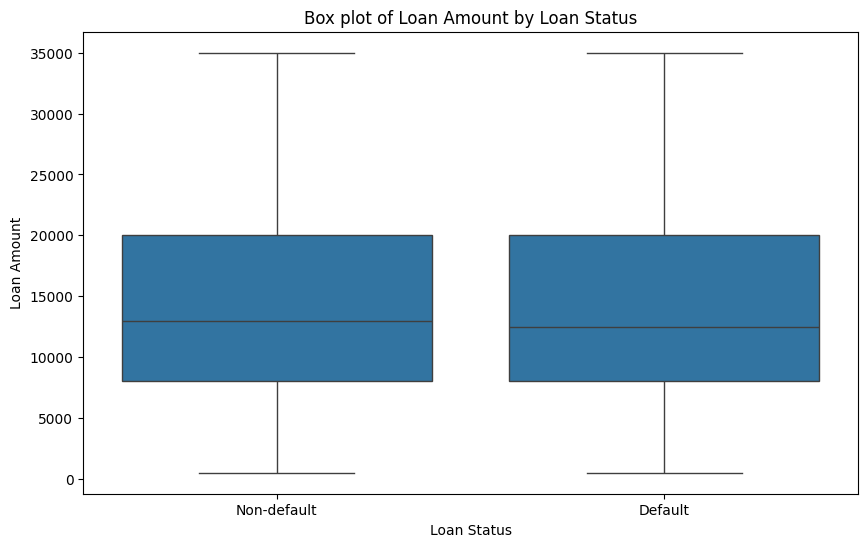

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=ldata)


plt.title('Box plot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')


/var/folders/hv/5dn5hgjs25b55wzdrz7cpzdc0000gn/T/ipykernel_5862/831769177.py:15: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='loan_status', y='loan_amnt', data=ldata, color='red', scale=0.5, markers='o')


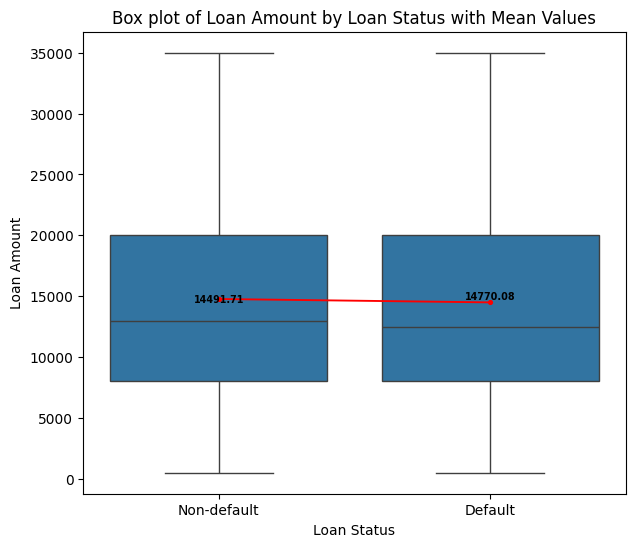

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(7, 6))  # 
sns.boxplot(x='loan_status', y='loan_amnt', data=ldata, showfliers=False)


mean_values = ldata.groupby('loan_status')['loan_amnt'].mean().values


sns.pointplot(x='loan_status', y='loan_amnt', data=ldata, color='red', scale=0.5, markers='o')


for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')


plt.title('Box plot of Loan Amount by Loan Status with Mean Values')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')


plt.show()


In [36]:
loan_df.printSchema()
print(loan_df.count())

root
 |-- id: long (nullable = true)
 |-- member_id: long (nullable = true)
 |-- loan_amnt: double (nullable = true)
 |-- funded_amnt: double (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: double (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- url: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: double (nul

24/04/16 01:25:13 WARN TaskSetManager: Stage 1 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


887379


In [20]:
loan_df.show(5)

24/04/04 01:23:39 WARN TaskSetManager: Stage 4 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+--------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+----------------

24/04/04 01:23:43 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 4 (TID 14): Attempting to kill Python Worker


In [32]:
loan_df.createOrReplaceTempView("club_loans")

24/04/20 17:32:53 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [33]:
balanced_loan_df.createOrReplaceTempView("club_loans2")

In [22]:
spark.sql("select loan_status, count(*)\
 from club_loans group by loan_status order by loan_status").show()

24/04/04 01:25:07 WARN TaskSetManager: Stage 5 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


+-----------+--------+
|loan_status|count(1)|
+-----------+--------+
|    Default|   47228|
|Non-default|  840151|
+-----------+--------+



In [24]:
spark.sql("select loan_status, count(*)\
 from club_loans group by loan_status order by loan_status").show()

24/04/04 01:25:22 WARN TaskSetManager: Stage 8 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


+-----------+--------+
|loan_status|count(1)|
+-----------+--------+
|    Default|   47228|
|Non-default|  840151|
+-----------+--------+



In [100]:
# These are functions of preprocessing of text mining,
# Write few words about the process and functions
from pyspark.ml.feature import VectorAssembler

document_assembler = DocumentAssembler() \
    .setInputCol("desc") \
    .setOutputCol("document")# convert document to array of tokens
tokenizer = Tokenizer() \
  .setInputCols(["document"]) \
  .setOutputCol("token")

# clean tokens
normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized")# remove stopwords
stopwords_cleaner = StopWordsCleaner()\
      .setInputCols("normalized")\
      .setOutputCol("cleanTokens")\
      .setCaseSensitive(False)# stems tokens to bring it to root form
stemmer = Stemmer() \
    .setInputCols(["cleanTokens"]) \
    .setOutputCol("stem")# Convert custom document structure to array of tokens.
finisher = Finisher() \
    .setInputCols(["stem"]) \
    .setOutputCols(["token_features"]) \
    .setOutputAsArray(True) \
    .setCleanAnnotations(False)# To generate Term Frequency
# ngram = NGram(n=3, inputCol="token_features", outputCol="token_features1")

hashingTF = HashingTF(inputCol="token_features", outputCol="rawFeatures", numFeatures=1000)# To generate Inverse Document Frequency
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=100)# convert labels (string) to integers. Easy to process compared to string.
vec_assembler=VectorAssembler(inputCols=['features','loan_amnt','int_rate','out_prncp','total_pymnt','recoveries',\
                                         'total_rec_late_fee','last_pymnt_amnt','home_ownership','term'],outputCol='all_features')

#label_stringIdx = StringIndexer(inputCol = "category", outputCol = "label")# define a simple Multinomial logistic regression model. Try different combination of hyperparameters and see what suits your data. You can also try different algorithms and compare the scores.
#label_to_stringIdx = IndexToString(inputCol="label", outputCol="article_class")# define the nlp pipeline


24/04/20 22:20:33 WARN StopWordsCleaner: Default locale set was [zh_FR_#Hans]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.


In [101]:
9349/176844

0.052865802628305175

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'dti', 'revol_bal', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'loan_status_numeric'],
      dtype='object')

In [48]:
vec_assembler_full_features=VectorAssembler(inputCols=[x for x in numeric_data.columns[:-1]].append("features"),outputCol='all_features')

In [49]:
vec_assembler_full_features

VectorAssembler_5804943263eb

In [35]:
nlp_pipeline = Pipeline(
    stages=[document_assembler,
            tokenizer,
            normalizer,
            stopwords_cleaner,
            stemmer,
            finisher,
            hashingTF,
            idf,
            vec_assembler
            ])
            #label_stringIdx])

In [42]:
[x for x in loan_df.columns[2:]]

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',

In [50]:
nlp_pipeline2 = Pipeline(
    stages=[document_assembler,
            tokenizer,
            normalizer,
            stopwords_cleaner,
            stemmer,
            finisher,
            hashingTF,
            idf,
            vec_assembler_full_features
            ])

In [39]:
result1 = nlp_pipeline.fit(loan_df).transform(loan_df)
#result.show(10,False)
#result[['features']].show(10,False)
#result[['label']].show(10,False)
#result.show(2)
#data = result.select(['Date','features','Following'])

#dtt2 = result.select(['Date','features','Following'])#,'Following','Listed'])#,'rawFeatures'])
#na = data[data.'Followers'.isnull()]
#na
#dtt2.show(5)


24/04/20 17:35:55 WARN TaskSetManager: Stage 0 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


In [90]:
balanced_loan_df

DataFrame[id: bigint, member_id: bigint, loan_amnt: double, funded_amnt: double, funded_amnt_inv: double, term: string, int_rate: double, installment: double, grade: string, sub_grade: string, emp_title: string, emp_length: string, home_ownership: string, annual_inc: double, verification_status: string, issue_d: string, loan_status: string, pymnt_plan: string, url: string, desc: string, purpose: string, title: string, zip_code: string, addr_state: string, dti: double, delinq_2yrs: double, earliest_cr_line: string, inq_last_6mths: double, mths_since_last_delinq: double, mths_since_last_record: double, open_acc: double, pub_rec: double, revol_bal: double, revol_util: double, total_acc: double, initial_list_status: string, out_prncp: double, out_prncp_inv: double, total_pymnt: double, total_pymnt_inv: double, total_rec_prncp: double, total_rec_int: double, total_rec_late_fee: double, recoveries: double, collection_recovery_fee: double, last_pymnt_d: string, last_pymnt_amnt: double, next_p

In [40]:
result2=nlp_pipeline.fit(balanced_loan_df).transform(balanced_loan_df)

24/04/20 17:37:22 WARN TaskSetManager: Stage 2 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


In [65]:
result1_all_F=result3

In [51]:
result3=nlp_pipeline2.fit(loan_df).transform(loan_df)

24/04/20 18:25:22 WARN TaskSetManager: Stage 6 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


In [66]:
result2_all_F=result4

In [54]:
result4=nlp_pipeline2.fit(balanced_loan_df).transform(balanced_loan_df)

24/04/20 18:37:56 WARN TaskSetManager: Stage 9 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


In [64]:
result1_multi=nlp_pipeline.fit(loan_df_multiclass).transform(loan_df_multiclass)

24/04/20 18:42:53 WARN TaskSetManager: Stage 18 contains a task of very large size (59070 KiB). The maximum recommended task size is 1000 KiB.


In [53]:
result3.show()

24/04/20 18:29:52 WARN TaskSetManager: Stage 8 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+------------

24/04/20 18:29:56 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 8 (TID 60): Attempting to kill Python Worker


In [89]:
result2.show()

24/04/20 20:23:56 WARN TaskSetManager: Stage 236 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-----------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+--------------

24/04/20 20:24:00 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 236 (TID 1792): Attempting to kill Python Worker


In [67]:
## you need to replace Na and Null values with zero

result1=result1.na.fill(value=0) # unbalanced 

result2=result2.na.fill(value=0) # balanced

result2_all_F=result2_all_F.na.fill(value=0)

result1_all_F=result1_all_F.na.fill(value=0)

result1_multi=result1_multi.na.fill(value=0)

In [70]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import MinMaxScaler

In [53]:
result1.show()

24/04/16 01:54:42 WARN TaskSetManager: Stage 14 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+------------

24/04/16 01:54:46 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 14 (TID 84): Attempting to kill Python Worker


In [68]:
def transformation(data):
  
  indexer = StringIndexer(inputCol="loan_status", outputCol="label")
  data = indexer.fit(data).transform(data)
  standardscaler=StandardScaler().setInputCol("all_features").setOutputCol("Scaled_features")
  data=standardscaler.fit(data).transform(data)
  # css = ChiSqSelector(featuresCol='all_features',outputCol='Selected_features',labelCol='label',fpr=0.05)
  # data=css.fit(data).transform(data)
  # css = ChiSqSelector(featuresCol='Scaled_features',outputCol='SelectedScaled_features',labelCol='label',fpr=0.05)
  # data=css.fit(data).transform(data)
  
  return data

In [29]:
df1=loan_df.sample(fraction=0.25,seed=123)
df2=loan_df.sample(fraction=0.5,seed=123)
df3=loan_df.sample(fraction=0.75,seed=123)
df4=loan_df

In [71]:
train_data_imb_selected_f=transformation(result1)

24/04/20 18:47:35 WARN TaskSetManager: Stage 23 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/20 18:47:39 WARN TaskSetManager: Stage 26 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


In [72]:
train_data_imb_all_f=transformation(result1_all_F)
train_data_imb_multi_selected_f=transformation(result1_multi)

24/04/20 18:49:43 WARN TaskSetManager: Stage 29 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/20 19:02:10 WARN TaskSetManager: Stage 32 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/20 19:02:13 WARN TaskSetManager: Stage 35 contains a task of very large size (59070 KiB). The maximum recommended task size is 1000 KiB.
24/04/20 19:02:14 WARN TaskSetManager: Stage 38 contains a task of very large size (59070 KiB). The maximum recommended task size is 1000 KiB.


In [73]:
# train_data1=transformation(result1)
train_data_b_selected_f=transformation(result2)
train_data_b_all_f=transformation(result2_all_F)

24/04/20 19:02:43 WARN TaskSetManager: Stage 41 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/20 19:02:44 WARN TaskSetManager: Stage 44 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/20 19:02:49 WARN TaskSetManager: Stage 47 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/20 19:02:49 WARN TaskSetManager: Stage 50 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


In [36]:
train_data2.show()

24/04/04 01:53:19 WARN DAGScheduler: Broadcasting large task binary with size 8.9 MiB
24/04/04 01:53:20 WARN TaskSetManager: Stage 82 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+------------

24/04/04 01:53:24 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 82 (TID 504): Attempting to kill Python Worker


In [74]:
train1,test1=train_data_imb_all_f.randomSplit([0.8,0.2],seed=123)
train2,test2=train_data_imb_selected_f.randomSplit([0.8,0.2],seed=123)
train3,test3=train_data_imb_multi_selected_f.randomSplit([0.8,0.2],seed=123)
train4,test4=train_data_b_all_f.randomSplit([0.8,0.2],seed=123)
train5,test5=train_data_b_selected_f.randomSplit([0.8,0.2],seed=123)
# train2,test2=train_data2.randomSplit([0.8,0.2],seed=123)
# train2,test2=train_data2.randomSplit([0.8,0.2],seed=123)
# train3,test3=train_data3.randomSplit([0.9,0.2],seed=123)
# train4,test4=train_data4.randomSplit([0.9,0.2],seed=123)

In [77]:
def confusmat(predict_test):
    pandas_df = predict_test.select("label",'prediction').toPandas()
    confusion_matrix = pd.crosstab(pandas_df['label'], pandas_df['prediction'], rownames=['Actual'], colnames=['Predicted'], margins=True)

    print(confusion_matrix)

In [75]:
#Model 1
### Run a Logistic Regression model with default parameters with orginal features
## Explain the evaluation of the model
# from pyspark.ml.regression import RandomForestRegressor
# from pyspark.ml.classification import RandomForestClassifier

def logistic_reg(train,test):

    lr = LogisticRegression(labelCol="label", featuresCol="features",maxIter=10, regParam=0.3, elasticNetParam=0.0)# To convert index(integer) to corresponding class labels
    lrModel=lr.fit(train)

    predict_test=lrModel.transform(test)
    predict_test.select("label","prediction").show(5)

    # obtain evaluator.
    evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

    # compute the classification error on test data.
    accuracy = evaluator.evaluate(predict_test)
    weighted_precision = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedPrecision"})
    weighted_recall = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedRecall"})
    print("Error = %g" % (1.0 - accuracy))
    print("Accuracy = %g" % ( accuracy))
    print ("Precision:", weighted_precision)
    print ("Recall:", weighted_recall)
    return predict_test

In [78]:
pred1_scaled=logistic_reg(train,test)

confusmat(pred1_scaled)

24/04/16 02:50:55 WARN TaskSetManager: Stage 175 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:51:43 WARN TaskSetManager: Stage 177 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:52:24 WARN TaskSetManager: Stage 179 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:52:25 WARN TaskSetManager: Stage 181 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:52:26 WARN TaskSetManager: Stage 183 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:52:27 WARN TaskSetManager: Stage 185 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:52:28 WARN TaskSetManager: Stage 187 contains a task of very large size (59061 KiB). The maximum recommended task size is 10

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       0.0|
|  1.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



24/04/16 02:53:19 WARN TaskSetManager: Stage 202 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:54:45 WARN TaskSetManager: Stage 204 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:56:10 WARN TaskSetManager: Stage 206 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Error = 0.0511581
Accuracy = 0.948842
Precision: 0.9469955349067557
Recall: 0.9488419171699352


24/04/16 02:57:32 WARN TaskSetManager: Stage 208 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Predicted     0.0  1.0     All
Actual                        
0.0        167463   32  167495
1.0          9015  334    9349
All        176478  366  176844


In [ ]:
draw_roc(pred1.select('label','probability').toPandas(),"Logistic Regression with Scaled Imbalanced Data")

24/04/16 03:01:10 WARN TaskSetManager: Stage 209 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


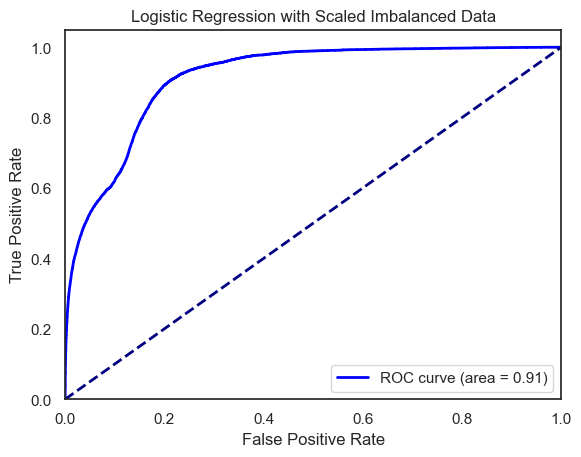

In [79]:
draw_roc(pred1.select('label','probability').toPandas(),"Logistic Regression with Scaled Imbalanced Data")

In [75]:
pred1=logistic_reg(train,test)



24/04/16 02:32:21 WARN TaskSetManager: Stage 140 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:32:59 WARN TaskSetManager: Stage 142 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:33:36 WARN TaskSetManager: Stage 144 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:33:38 WARN TaskSetManager: Stage 146 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:33:39 WARN TaskSetManager: Stage 148 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:33:40 WARN TaskSetManager: Stage 150 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:33:42 WARN TaskSetManager: Stage 152 contains a task of very large size (59061 KiB). The maximum recommended task size is 10

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       0.0|
|  1.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



24/04/16 02:34:36 WARN TaskSetManager: Stage 167 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:36:10 WARN TaskSetManager: Stage 169 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 02:37:47 WARN TaskSetManager: Stage 171 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Error = 0.0511581
Accuracy = 0.948842
Precision: 0.9469955349067557
Recall: 0.9488419171699352


24/04/16 02:39:27 WARN TaskSetManager: Stage 173 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Predicted     0.0  1.0     All
Actual                        
0.0        167463   32  167495
1.0          9015  334    9349
All        176478  366  176844


In [79]:
confusmat(pred1)

24/04/20 19:13:40 WARN TaskSetManager: Stage 88 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Predicted     0.0  1.0     All
Actual                        
0.0        167454   41  167495
1.0          9338   11    9349
All        176792   52  176844


24/04/16 02:30:08 WARN TaskSetManager: Stage 139 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


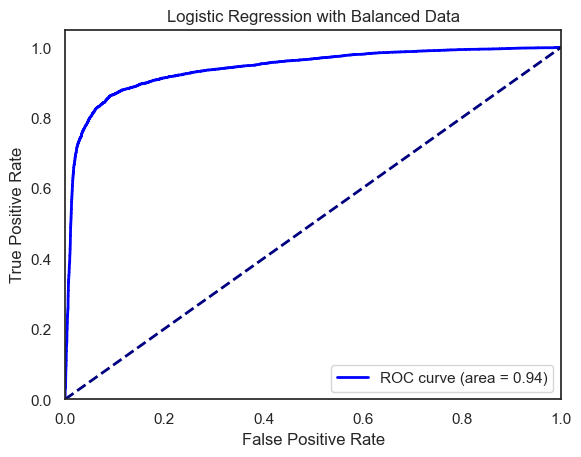

In [74]:
draw_roc(pred2.select('label','probability').toPandas(),"Logistic Regression with Balanced Data") #

In [80]:
pred2_scaled=logistic_reg(train2,test2)
confusmat(pred2_scaled)

24/04/16 03:04:48 WARN TaskSetManager: Stage 210 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:05:02 WARN TaskSetManager: Stage 212 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:05:16 WARN TaskSetManager: Stage 214 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:05:16 WARN TaskSetManager: Stage 216 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:05:17 WARN TaskSetManager: Stage 218 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:05:17 WARN TaskSetManager: Stage 220 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:05:17 WARN TaskSetManager: Stage 222 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



24/04/16 03:05:43 WARN TaskSetManager: Stage 239 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:05:58 WARN TaskSetManager: Stage 241 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:06:15 WARN TaskSetManager: Stage 243 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


Error = 0.116274
Accuracy = 0.883726
Precision: 0.8841084012696188
Recall: 0.8837258986273567


Predicted   0.0   1.0    All
Actual                      
0.0        8432   940   9372
1.0        1237  8114   9351
All        9669  9054  18723


24/04/16 03:11:47 WARN TaskSetManager: Stage 244 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


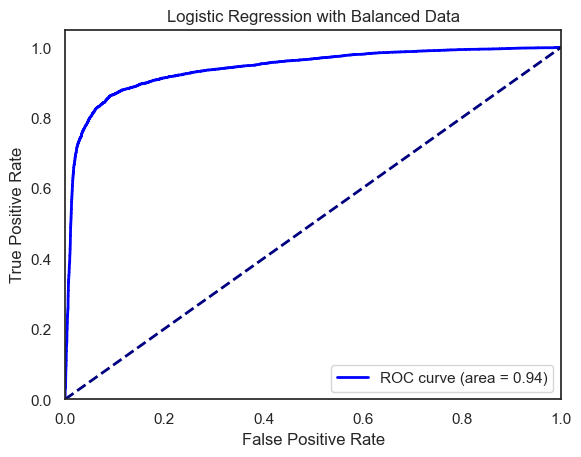

In [81]:
draw_roc(pred2_scaled.select('label','probability').toPandas(),"Logistic Regression with Balanced Data")

In [78]:
def draw_roc(data,title):
    from sklearn.metrics import roc_curve, auc
    y_true = data['label']
    y_scores = data['probability'].apply(lambda x: x[1])


    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()



In [47]:
%matplotlib inline

In [41]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import BinaryClassificationEvaluator


evaluator = BinaryClassificationEvaluator()
roc = evaluator.evaluate(predict_test, {evaluator.metricName: "areaUnderROC"})
print("Area under ROC curve: %g" % roc)





24/04/04 02:18:42 WARN DAGScheduler: Broadcasting large task binary with size 9.1 MiB
24/04/04 02:18:43 WARN TaskSetManager: Stage 135 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Area under ROC curve: 0.605019


In [46]:
pandas_df['prediction']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
88499    0.0
88500    0.0
88501    0.0
88502    0.0
88503    0.0
Name: prediction, Length: 88504, dtype: float64

In [60]:
predict_test.select('probability').show()

24/04/04 02:54:40 WARN DAGScheduler: Broadcasting large task binary with size 4.9 MiB
24/04/04 02:54:41 WARN TaskSetManager: Stage 169 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+
|         probability|
+--------------------+
|[0.92075021766967...|
|[0.91857569857469...|
|[0.93712170261563...|
|[0.91090476039842...|
|[0.95435560440593...|
|[0.90880127786749...|
|[0.91031967575517...|
|[0.88294001656070...|
|[0.93712170261563...|
|[0.95435560440593...|
|[0.91819469850026...|
|[0.92731679153540...|
|[0.92216147754212...|
|[0.92660162807948...|
|[0.92911480408774...|
|[0.93712170261563...|
|[0.91301268792122...|
|[0.93266753604819...|
|[0.91354882345415...|
|[0.89734669134901...|
+--------------------+
only showing top 20 rows



In [44]:
plt.show()

In [82]:
#Model 2
### Run a Random Forest model with default parameters with orginal features
## Explain the evaluation of the model
def randomforest_regression(train,test):

    from pyspark.ml.regression import RandomForestRegressor
    from pyspark.ml.classification import RandomForestClassifier

    rf = RandomForestClassifier(labelCol="label", featuresCol="all_features", numTrees=5)
    RFModel=rf.fit(train)
    # result = RFModel.transform(test)
    RFModel.featureImportances
    predict_test=RFModel.transform(test)
    predict_test.select("label","prediction").show(5)

    # obtain evaluator.
    evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

    # compute the classification error on test data.
    accuracy = evaluator.evaluate(predict_test)
    weighted_precision = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedPrecision"})
    weighted_recall = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedRecall"})
    print("Error = %g" % (1.0 - accuracy))
    print("Accuracy = %g" % ( accuracy))
    print ("Precision:", weighted_precision)
    print ("Recall:", weighted_recall)
    return predict_test

In [83]:
pred_rf1=randomforest_regression(train,test)

confusmat(pred_rf1)

24/04/16 03:30:52 WARN TaskSetManager: Stage 245 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:31:24 WARN TaskSetManager: Stage 246 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:32:31 WARN TaskSetManager: Stage 247 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:33:33 WARN TaskSetManager: Stage 249 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:34:47 WARN TaskSetManager: Stage 251 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:34:51 WARN TaskSetManager: Stage 253 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:34:54 WARN TaskSetManager: Stage 255 contains a task of very large size (59061 KiB). The maximum recommended task size is 10

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       0.0|
|  1.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



24/04/16 03:35:45 WARN TaskSetManager: Stage 260 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:38:27 WARN TaskSetManager: Stage 262 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:41:13 WARN TaskSetManager: Stage 264 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Error = 0.0526849
Accuracy = 0.947315
Precision: 0.9500913438176589
Recall: 0.9473151478138925


24/04/16 03:43:06 WARN TaskSetManager: Stage 266 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Predicted     0.0  1.0     All
Actual                        
0.0        167495    0  167495
1.0          9317   32    9349
All        176812   32  176844


24/04/16 03:47:29 WARN TaskSetManager: Stage 267 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


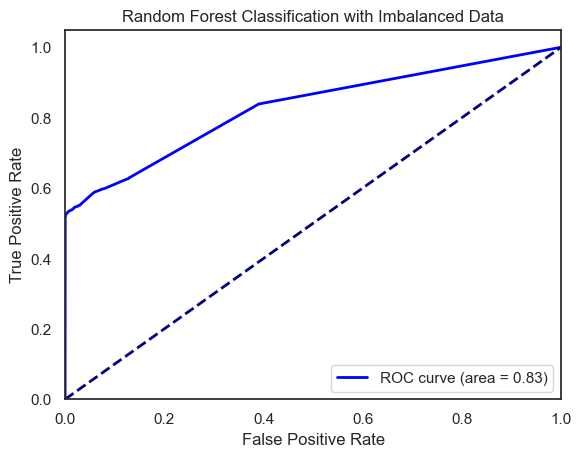

In [85]:
draw_roc(pred_rf1.select('label','probability').toPandas(),"Random Forest Classification with Imbalanced Data")

In [86]:
pred_rf2=randomforest_regression(train2,test2)

confusmat(pred_rf2)

24/04/16 03:51:21 WARN TaskSetManager: Stage 268 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:51:30 WARN TaskSetManager: Stage 269 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:51:47 WARN TaskSetManager: Stage 270 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:52:00 WARN TaskSetManager: Stage 272 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:52:10 WARN TaskSetManager: Stage 274 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:52:10 WARN TaskSetManager: Stage 276 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:52:10 WARN TaskSetManager: Stage 278 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



24/04/16 03:52:33 WARN TaskSetManager: Stage 285 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:52:48 WARN TaskSetManager: Stage 287 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 03:53:06 WARN TaskSetManager: Stage 289 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


Error = 0.28019
Accuracy = 0.71981
Precision: 0.7477693377233112
Recall: 0.719809859531058


Predicted   0.0    1.0    All
Actual                       
0.0        5179   4193   9372
1.0        1053   8298   9351
All        6232  12491  18723


24/04/16 03:54:42 WARN TaskSetManager: Stage 290 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


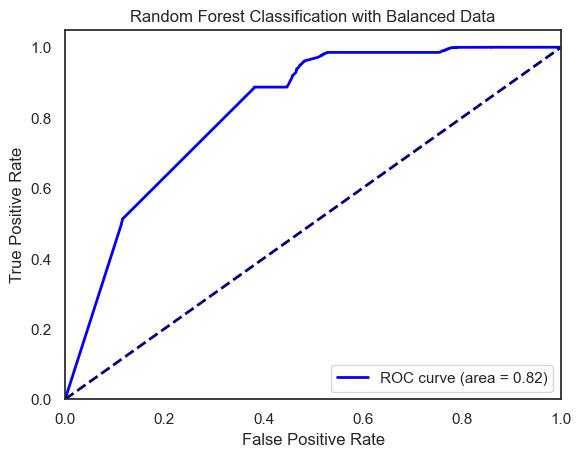

24/04/16 10:01:32 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 2575585 ms exceeds timeout 120000 ms
24/04/16 10:01:32 WARN SparkContext: Killing executors is not supported by current scheduler.
24/04/16 10:01:39 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$

In [87]:
draw_roc(pred_rf2.select('label','probability').toPandas(),"Random Forest Classification with Balanced Data")

In [34]:
def decisiontree_classification(train,test):

    from pyspark.ml.classification import DecisionTreeClassifier
    dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
    dtmodel=dt.fit(train)
    result = dtmodel.transform(test)
    print(dtmodel.featureImportances)
    predict_test=dtmodel.transform(test)
    predict_test.select("label","prediction").show(5)

    # obtain evaluator.
    evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

    # compute the classification error on test data.
    accuracy = evaluator.evaluate(predict_test)
    weighted_precision = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedPrecision"})
    weighted_recall = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedRecall"})
    print("Error = %g" % (1.0 - accuracy))
    print("Accuracy = %g" % ( accuracy))
    print ("Precision:", weighted_precision)
    print ("Recall:", weighted_recall)

    return (predict_test,dtmodel)

In [35]:
pred_dt1,dtmodel=decisiontree_classification(train,test)

24/04/16 15:39:14 WARN TaskSetManager: Stage 16 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 15:40:03 WARN TaskSetManager: Stage 17 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 15:41:54 WARN TaskSetManager: Stage 18 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 15:44:04 WARN TaskSetManager: Stage 20 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 15:46:00 WARN TaskSetManager: Stage 22 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 15:46:05 WARN TaskSetManager: Stage 24 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 15:46:09 WARN TaskSetManager: Stage 26 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.

(1000,[2,22,77,122,135,211,230,328,403,448,451,495,587,614,617,638,783,968,969],[0.0010663162749038025,0.001350667281544817,0.0023265082361537503,0.00730006044186204,0.007667553918409792,0.03400162668626301,0.004599562015279865,0.03073551484133925,0.004685469581161751,0.003178723460414077,0.00126378225173784,0.00342287982391858,0.8788312373292942,0.0025879741728276643,0.002857849615550576,0.003031333530487381,0.002013470689235731,0.006464940073476964,0.0026145297761388502])


24/04/16 15:46:21 WARN TaskSetManager: Stage 30 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       0.0|
|  1.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



24/04/16 15:47:06 WARN TaskSetManager: Stage 31 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 15:49:21 WARN TaskSetManager: Stage 33 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 15:51:26 WARN TaskSetManager: Stage 35 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Error = 0.0529223
Accuracy = 0.947078
Precision: 0.9103007569492733
Recall: 0.9470776503585081


TypeError: confusmat() missing 1 required positional argument: 'predict_test'

In [36]:
confusmat(pred_dt1)

24/04/16 15:59:31 WARN TaskSetManager: Stage 37 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Predicted     0.0  1.0     All
Actual                        
0.0        167480   15  167495
1.0          9344    5    9349
All        176824   20  176844


24/04/20 23:44:36 WARN TaskSetManager: Stage 237 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


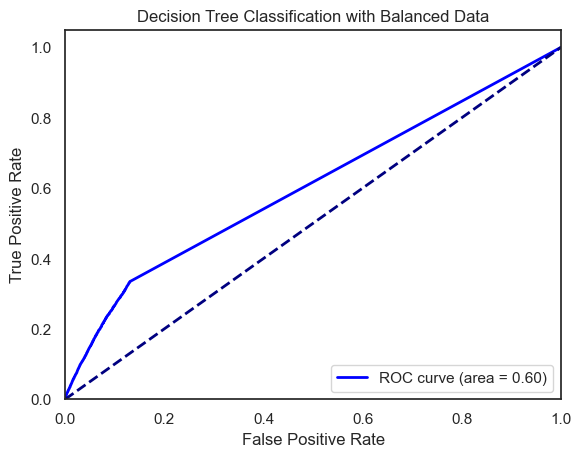

24/04/21 02:05:56 WARN TransportChannelHandler: Exception in connection from /10.63.5.162:55858
java.io.IOException: Operation timed out
	at java.base/sun.nio.ch.FileDispatcherImpl.read0(Native Method)
	at java.base/sun.nio.ch.SocketDispatcher.read(SocketDispatcher.java:39)
	at java.base/sun.nio.ch.IOUtil.readIntoNativeBuffer(IOUtil.java:276)
	at java.base/sun.nio.ch.IOUtil.read(IOUtil.java:233)
	at java.base/sun.nio.ch.IOUtil.read(IOUtil.java:223)
	at java.base/sun.nio.ch.SocketChannelImpl.read(SocketChannelImpl.java:358)
	at io.netty.buffer.PooledByteBuf.setBytes(PooledByteBuf.java:254)
	at io.netty.buffer.AbstractByteBuf.writeBytes(AbstractByteBuf.java:1132)
	at io.netty.channel.socket.nio.NioSocketChannel.doReadBytes(NioSocketChannel.java:357)
	at io.netty.channel.nio.AbstractNioByteChannel$NioByteUnsafe.read(AbstractNioByteChannel.java:151)
	at io.netty.channel.nio.NioEventLoop.processSelectedKey(NioEventLoop.java:788)
	at io.netty.channel.nio.NioEventLoop.processSelectedKeysOptim

In [102]:
draw_roc(pred1.select('label','probability').toPandas(),"Decision Tree Classification with Balanced Data")

24/04/16 16:22:30 WARN TaskSetManager: Stage 39 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


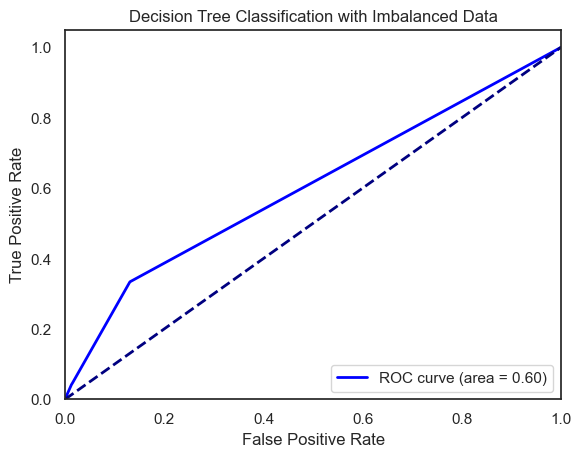

In [38]:
draw_roc(pred_dt1.select('label','probability').toPandas(),"Decision Tree Classification with Imbalanced Data")

In [39]:
pred_dt2,dtmodel2=decisiontree_classification(train2,test2)

24/04/16 16:28:48 WARN TaskSetManager: Stage 40 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:28:57 WARN TaskSetManager: Stage 41 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:29:03 WARN TaskSetManager: Stage 42 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:29:09 WARN TaskSetManager: Stage 44 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:29:16 WARN TaskSetManager: Stage 46 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:29:16 WARN TaskSetManager: Stage 48 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:29:16 WARN TaskSetManager: Stage 50 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/

(1000,[48,57,59,117,211,230,253,304,312,349,368,369,434,487,582,587,588,594,643,687,790,792,913],[0.001995526064716984,0.0005613946704501161,0.0007578828051076566,0.00167725689417193,0.042771385645644235,0.0010854046952351348,0.00696861813740995,0.0021316070502095854,0.0013099208977169375,0.0008252501655616726,0.0012054033376335707,0.0011696336475402222,0.0033895496318245687,0.0008679086502192863,0.005124898896248235,0.9110173298674198,0.0018180846262007312,0.003423101008834185,0.0015552791581739164,0.004474514382987502,0.0020624999421276066,0.0018412099345863776,0.0019663398899799913])


24/04/16 16:29:17 WARN TaskSetManager: Stage 54 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:29:21 WARN TaskSetManager: Stage 55 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



24/04/16 16:29:33 WARN TaskSetManager: Stage 57 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:29:47 WARN TaskSetManager: Stage 59 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


Error = 0.399028
Accuracy = 0.600972
Precision: 0.6419045558751106
Recall: 0.6009720664423437


In [40]:
confusmat(pred_dt2)

24/04/16 16:32:02 WARN TaskSetManager: Stage 61 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


Predicted   0.0    1.0    All
Actual                       
0.0        3130   6243   9373
1.0        1228   8122   9350
All        4358  14365  18723


24/04/16 16:40:11 WARN TaskSetManager: Stage 62 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


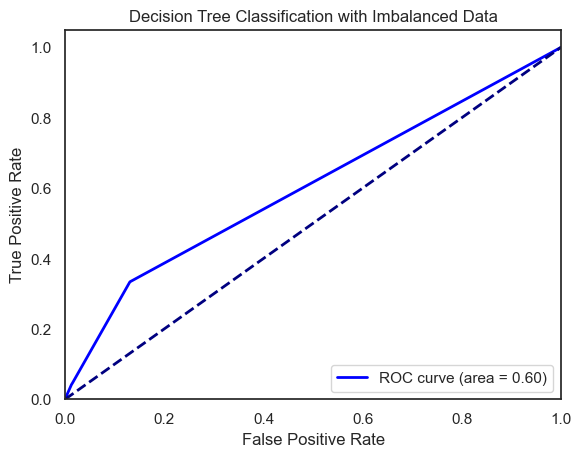

In [41]:
draw_roc(pred_dt1.select('label','probability').toPandas(),"Decision Tree Classification with Imbalanced Data")

In [72]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import DecisionTreeClassifier
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=10)
gbtmodel=gbt.fit(train)
# result = gbtmodel.transform(test)
print(gbtmodel.featureImportances)
predict_test=gbtmodel.transform(test)
predict_test.select("label","prediction").show(5)

# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# compute the classification error on test data.
accuracy = evaluator.evaluate(predict_test)
weighted_precision = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedPrecision"})
weighted_recall = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedRecall"})
print("Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % ( accuracy))
print ("Precision:", weighted_precision)
print ("Recall:", weighted_recall)

24/04/04 03:25:26 WARN DAGScheduler: Broadcasting large task binary with size 4.9 MiB
24/04/04 03:25:26 WARN TaskSetManager: Stage 196 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/04 03:25:38 WARN DAGScheduler: Broadcasting large task binary with size 4.9 MiB
24/04/04 03:25:38 WARN TaskSetManager: Stage 197 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/04 03:26:03 WARN DAGScheduler: Broadcasting large task binary with size 5.0 MiB
24/04/04 03:26:04 WARN TaskSetManager: Stage 198 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/04 03:26:35 WARN DAGScheduler: Broadcasting large task binary with size 5.0 MiB
24/04/04 03:26:35 WARN TaskSetManager: Stage 200 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/04 03:26:59 WARN DAGScheduler: Broadcasting large task binary with size 5.

KeyboardInterrupt: 

24/04/04 03:27:20 WARN DAGScheduler: Broadcasting large task binary with size 5.0 MiB
24/04/04 03:27:20 WARN TaskSetManager: Stage 220 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/04 03:27:22 WARN DAGScheduler: Broadcasting large task binary with size 5.0 MiB
24/04/04 03:27:22 WARN TaskSetManager: Stage 222 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/04 03:27:24 WARN DAGScheduler: Broadcasting large task binary with size 5.0 MiB
24/04/04 03:27:24 WARN TaskSetManager: Stage 224 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


In [97]:
from pyspark.ml.classification import LogisticRegression, OneVsRest

from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import DecisionTreeClassifier
lr = LogisticRegression(labelCol="label", featuresCol="features",maxIter=10, tol=1E-6, fitIntercept=True)
ovr = OneVsRest(classifier=lr)
ovrmodel=ovr.fit(train2)
result = ovrmodel.transform(test2)
# print(ovrmodel.featureImportances)
predict_test=ovrmodel.transform(test2)
predict_test.select("label","prediction").show(5)

# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# compute the classification error on test data.
accuracy = evaluator.evaluate(predict_test)
weighted_precision = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedPrecision"})
weighted_recall = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedRecall"})
print("Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % ( accuracy))
print ("Precision:", weighted_precision)
print ("Recall:", weighted_recall)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       0.0|
|  2.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows

Error = 0.259887
Accuracy = 0.740113
Precision: 0.5716146469333594
Recall: 0.7401129943502824


In [42]:
def naivebayes_classification(train,test):

    from pyspark.ml.classification import NaiveBayes

    from pyspark.ml.classification import GBTClassifier
    from pyspark.ml.classification import DecisionTreeClassifier
    nb = NaiveBayes(labelCol="label", featuresCol="features",smoothing=1.0, modelType="multinomial")

    nbmodel=nb.fit(train)
    # result = nbmodel.transform(test)
    # print(ovrmodel.featureImportances)
    predict_test=nbmodel.transform(test)
    predict_test.select("label","prediction").show(5)

    # obtain evaluator.
    evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

    # compute the classification error on test data.
    accuracy = evaluator.evaluate(predict_test)
    weighted_precision = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedPrecision"})
    weighted_recall = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedRecall"})
    print("Error = %g" % (1.0 - accuracy))
    print("Accuracy = %g" % ( accuracy))
    print ("Precision:", weighted_precision)
    print ("Recall:", weighted_recall)

    return predict_test

In [43]:
pred_nb1=naivebayes_classification(train,test)
confusmat(pred_nb1)

24/04/16 16:55:38 WARN TaskSetManager: Stage 63 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:57:17 WARN TaskSetManager: Stage 66 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  1.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



24/04/16 16:58:09 WARN TaskSetManager: Stage 67 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:58:46 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/04/16 16:59:18 WARN TaskSetManager: Stage 69 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 16:59:56 WARN TaskSetManager: Stage 71 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Error = 0.0703388
Accuracy = 0.929661
Precision: 0.9088441370040695
Recall: 0.9296611702969849


24/04/16 17:00:46 WARN TaskSetManager: Stage 73 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Predicted     0.0   1.0     All
Actual                         
0.0        163627  3868  167495
1.0          8571   778    9349
All        172198  4646  176844


In [44]:
confusmat(pred_nb1)

24/04/16 17:03:02 WARN TaskSetManager: Stage 74 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


Predicted     0.0   1.0     All
Actual                         
0.0        163627  3868  167495
1.0          8571   778    9349
All        172198  4646  176844


24/04/16 17:09:57 WARN TaskSetManager: Stage 76 contains a task of very large size (59061 KiB). The maximum recommended task size is 1000 KiB.


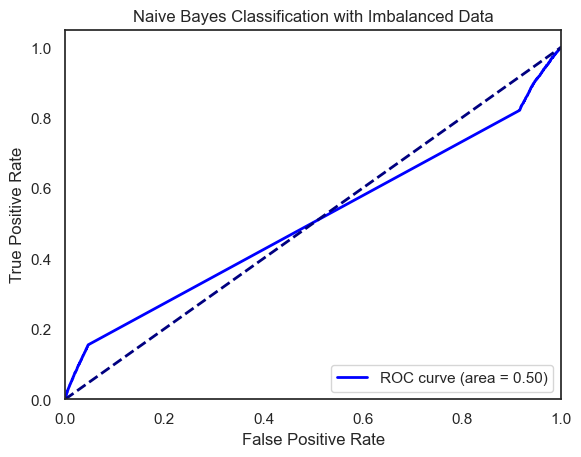

In [46]:
draw_roc(pred_nb1.select('label','probability').toPandas(),"Naive Bayes Classification with Imbalanced Data")

In [47]:
pred_nb2=naivebayes_classification(train2,test2)
confusmat(pred_nb2)

24/04/16 17:14:06 WARN TaskSetManager: Stage 77 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 17:14:18 WARN TaskSetManager: Stage 80 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



24/04/16 17:14:23 WARN TaskSetManager: Stage 81 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 17:14:35 WARN TaskSetManager: Stage 83 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 17:14:43 WARN TaskSetManager: Stage 85 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.
24/04/16 17:14:51 WARN TaskSetManager: Stage 87 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


Error = 0.446136
Accuracy = 0.553864
Precision: 0.6367820199260921
Recall: 0.5538642311595363


Predicted   0.0    1.0    All
Actual                       
0.0        1558   7815   9373
1.0         538   8812   9350
All        2096  16627  18723


24/04/16 17:15:43 WARN TaskSetManager: Stage 88 contains a task of very large size (6511 KiB). The maximum recommended task size is 1000 KiB.


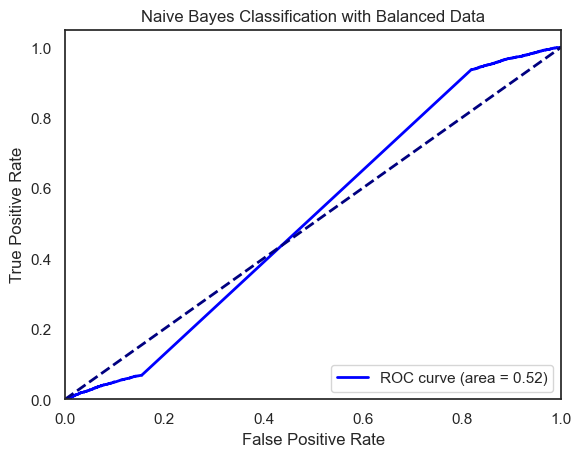

In [48]:
draw_roc(pred_nb2.select('label','probability').toPandas(),"Naive Bayes Classification with Balanced Data")

In [105]:
train2.show()

+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+------------

In [106]:
from pyspark.ml.classification import FMClassifier

fm = FMClassifier(labelCol="label", featuresCol="Newfeatures2", stepSize=0.001)

fmmodel=fm.fit(train2)
result = fmmodel.transform(test2)
# print(ovrmodel.featureImportances)
predict_test=fmmodel.transform(test2)
predict_test.select("label","prediction").show(5)

# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# compute the classification error on test data.
accuracy = evaluator.evaluate(predict_test)
weighted_precision = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedPrecision"})
weighted_recall = evaluator.evaluate(predict_test, {evaluator.metricName: "weightedRecall"})
print("Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % ( accuracy))
print ("Precision:", weighted_precision)
print ("Recall:", weighted_recall)

Py4JJavaError: An error occurred while calling o32911.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 1211.0 failed 1 times, most recent failure: Lost task 0.0 in stage 1211.0 (TID 1185) (5cd512585c17 executor driver): java.lang.RuntimeException: Labels MUST be in {0, 1}, but got 2.0
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:223)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:302)
	at org.apache.spark.storage.BlockManager.$anonfun$doPutIterator$1(BlockManager.scala:1597)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1524)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1588)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:1389)
	at org.apache.spark.storage.BlockManager.getOrElseUpdateRDDBlock(BlockManager.scala:1343)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:379)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.count(RDD.scala:1296)
	at org.apache.spark.mllib.optimization.GradientDescent$.runMiniBatchSGD(GradientDescent.scala:216)
	at org.apache.spark.mllib.optimization.GradientDescent.optimizeWithLossReturned(GradientDescent.scala:154)
	at org.apache.spark.ml.regression.FactorizationMachines.trainImpl(FMRegressor.scala:155)
	at org.apache.spark.ml.regression.FactorizationMachines.trainImpl$(FMRegressor.scala:134)
	at org.apache.spark.ml.classification.FMClassifier.trainImpl(FMClassifier.scala:71)
	at org.apache.spark.ml.classification.FMClassifier.$anonfun$train$1(FMClassifier.scala:206)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.classification.FMClassifier.train(FMClassifier.scala:179)
	at org.apache.spark.ml.classification.FMClassifier.train(FMClassifier.scala:71)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:114)
	at sun.reflect.GeneratedMethodAccessor203.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.RuntimeException: Labels MUST be in {0, 1}, but got 2.0
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage2.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:223)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:302)
	at org.apache.spark.storage.BlockManager.$anonfun$doPutIterator$1(BlockManager.scala:1597)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1524)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1588)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:1389)
	at org.apache.spark.storage.BlockManager.getOrElseUpdateRDDBlock(BlockManager.scala:1343)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:379)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [25]:
indexed.show()

+-------+---------+---------+-----------+---------------+----------+--------+-----------+-----+---------+--------------------+----------+--------------+----------+-------------------+--------+-----------+----------+--------------------+--------------------+------------------+--------------------+--------+----------+-----+-----------+----------------+--------------+----------------------+----------------------+--------+-------+---------+----------+---------+-------------------+---------+-------------+-------------+---------------+---------------+-------------+------------------+----------+-----------------------+------------+---------------+------------+------------------+--------------------------+---------------------------+-----------+----------------+----------------+---------+-------------------------+--------------+------------+-----------+-----------+----------+-----------+-----------+------------------+------------+-------+-----------+-----------+----------+--------+------------